Binhao Chen
Pricing Strategy with Segmentation


# Import data

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [ ]:
## https://www.statology.org/elbow-method-in-python/
## https://www.statology.org/logistic-regression-python/

In [ ]:
!git clone https://github.com/BINHAOCHENYOUNG/Targeting-Stategy-Clustering-Analysis

fatal: destination path 'Targeting-Stategy-Clustering-Analysis' already exists and is not an empty directory.


In [ ]:
mydata = pd.read_csv('Targeting-Stategy-Clustering-Analysis/CASE_CUSTOMER.csv', index_col=0)

In [ ]:
mydata

In [ ]:
X = mydata[['session_cnt', 'session_purchase_pct', 'total_clicks', 'item_clicks', 'avg_time_in_one_click', 'total_time_in_a_session', 'session_discount_pct', 'session_purchase_discount_pct']].copy()

In [ ]:
# mydata. columns. values. tolist() 

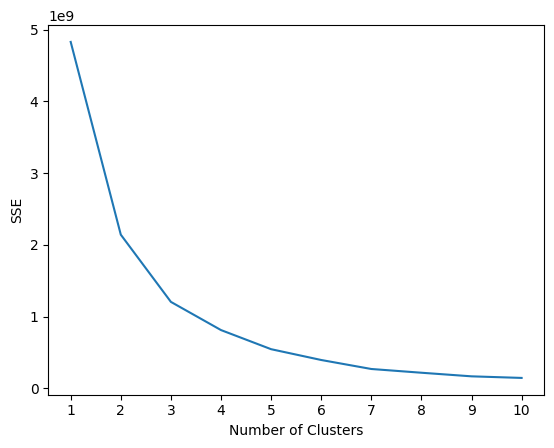

In [ ]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1234,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# K-means clustering

In [ ]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1234)

#fit k-means algorithm to data
kmeans.fit(X)

#view cluster assignments for each observation
kmeans.labels_

# array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
#append cluster assingments to original DataFrame
mydata['cluster'] = kmeans.labels_

#view updated DataFrame
mydata['cluster'].value_counts()

1    6085
0    1546
2     174
Name: cluster, dtype: int64

In [ ]:
cluster0 = mydata.loc[mydata['cluster'] == 0]
cluster1 = mydata.loc[mydata['cluster'] == 1]
cluster2 = mydata.loc[mydata['cluster'] == 2]

In [ ]:
mydata.describe()

,session_cnt,session_purchase_pct,total_clicks,item_clicks,avg_time_in_one_click,total_time_in_a_session,avg_price,session_discount_pct,session_purchase_discount_pct,cluster
count,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7805.000000,7550.000000,7805.000000,7805.000000,7805.000000
mean,5.158873,0.281146,5.259848,2.818577,91.591833,570.804093,66.963506,0.714912,0.193898,0.824215
std,7.544783,0.329859,5.255589,2.313830,68.039164,783.706058,37.929229,0.327140,0.295093,0.435311
min,1.000000,0.000000,1.000000,1.000000,13.066667,60.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,1.333333,59.250000,120.000000,45.000000,0.500000,0.000000,1.000000
50%,3.000000,0.166667,4.000000,2.090909,65.500000,315.000000,61.008333,0.800000,0.000000,1.000000
75%,6.000000,0.500000,6.500000,3.500000,102.949197,718.200000,80.500000,1.000000,0.307692,1.000000
max,157.000000,1.000000,83.000000,46.000000,782.875000,17291.000000,559.000000,1.000000,1.000000,2.000000


In [ ]:
cluster0.describe()
# Low: session_purchase_pct, item_clicks, 
# High: session_cnt, total_clicks, avg_time_in_one_click, total_time_in_a_session


# Profile: New Graduates

In [ ]:
cluster1.describe()
# Low session count
# High purchase pct, total Clicks, iterm clicks, avg_time_in_one_click, total_time_in_a_session, session_discount-pct
 
#  Profile: Housewife

In [ ]:
cluster2.describe()
# Low: total_clicks,item_clicks ,avg_time_in_one_click, session_discount_pct
# High: session_cnt

# Profile: Office Lady

# Logistic Model: Price - Purchase Willingness


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

np.random.seed(1234)

In [ ]:
#import dataset from CSV file on Github
# url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
Dove = pd.read_csv('Targeting-Stategy-Clustering-Analysis/CASE_SESSION_Dove.csv')

#view first six rows of dataset
Dove[0:6]


,session,user_id,sku_id,time,price,discount,purchase
0,6,001BF25EB8094642,2003759,100,8.0,0,0
1,13,002275B1CA67BDA1,2003759,66,9.3,1,0
2,43,0043BF3B3DDE01BC,2003759,60,19.0,0,0
3,44,0043BF3B3DDE01BC,2003759,60,9.3,1,0
4,73,0069839AD0FAE6E2,2003759,120,9.0,1,0
5,177,0135CD39AB172D0E,2003759,1023,409.0,0,0


In [ ]:
# Left join on Keys"user_id"
Dove = Dove.merge(mydata['cluster'], on='user_id', how='left')

In [ ]:
Dove

,session,user_id,sku_id,time,price,discount,purchase,cluster
0,6,001BF25EB8094642,2003759,100,8.0,0,0,1
1,13,002275B1CA67BDA1,2003759,66,9.3,1,0,1
2,43,0043BF3B3DDE01BC,2003759,60,19.0,0,0,1
3,44,0043BF3B3DDE01BC,2003759,60,9.3,1,0,1
4,73,0069839AD0FAE6E2,2003759,120,9.0,1,0,1
...,...,...,...,...,...,...,...,...
1327,40179,FF372C1E5851F770,2003759,60,8.0,0,0,1
1328,40178,FF372C1E5851F770,2003759,44,19.0,0,0,1
1329,40218,FF745B8B3E225CE0,2003759,784,9.0,1,0,1
1330,40249,FFD4993014A724BE,2003759,1315,409.0,0,1,1


In [ ]:
# Dove. columns. values. tolist() 

Dove.dtypes

session       int64
user_id      object
sku_id        int64
time          int64
price       float64
discount      int64
purchase      int64
cluster       int32
dtype: object

In [ ]:
Dove['discount'] = Dove['discount'].astype('str')
Dove['purchase'] = Dove['purchase'].astype('str')
Dove['cluster'] = Dove['cluster'].astype('str')

In [ ]:
# create dummy variables
Dove[['cluster0','cluster1','cluster2']] = pd.get_dummies(Dove['cluster'])


In [ ]:
#define the predictor variables and the response variable
X = Dove[['time', 'price','discount','cluster0','cluster1','cluster2']]
y = Dove['purchase']

#split the dataset into training (70%) and testing (30%) sets
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)  

In [ ]:
#instantiate the model
log_regression = LogisticRegression(solver='lbfgs')

#fit the model using the training data
log_regression.fit(X,y)

#use model to make predictions on test data
# y_pred = log_regression.predict(X_test)

LogisticRegression()

In [ ]:
# Print the coefficients
coef = pd.DataFrame(log_regression.coef_, columns=X.columns, index=['Coefficient'])
intercept = pd.DataFrame(log_regression.intercept_, columns=['Intercept'], index=['Coefficient'])



In [ ]:
print(coef)

                 time     price  discount  cluster0  cluster1  cluster2
Coefficient  0.000842 -0.001158  0.322362 -0.563854  -0.14876 -0.177869


In [ ]:
print(intercept)

             Intercept
Coefficient   -0.91741


In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
def sigmoid(x):
    return(1 / (1 + np.exp(-x)))

In [ ]:
sigmoid(coef)

,time,price,discount,cluster0,cluster1,cluster2
Coefficient,0.50021,0.49971,0.5799,0.362656,0.462878,0.45565


# All customers have same price sensitivity?

In [ ]:
Dove

,session,user_id,sku_id,time,price,discount,purchase,cluster,cluster0,cluster1,cluster2
0,6,001BF25EB8094642,2003759,100,8.0,0,0,1,0,1,0
1,13,002275B1CA67BDA1,2003759,66,9.3,1,0,1,0,1,0
2,43,0043BF3B3DDE01BC,2003759,60,19.0,0,0,1,0,1,0
3,44,0043BF3B3DDE01BC,2003759,60,9.3,1,0,1,0,1,0
4,73,0069839AD0FAE6E2,2003759,120,9.0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1327,40179,FF372C1E5851F770,2003759,60,8.0,0,0,1,0,1,0
1328,40178,FF372C1E5851F770,2003759,44,19.0,0,0,1,0,1,0
1329,40218,FF745B8B3E225CE0,2003759,784,9.0,1,0,1,0,1,0
1330,40249,FFD4993014A724BE,2003759,1315,409.0,0,1,1,0,1,0


In [ ]:
# Create interaction terms
Dove['price_cluster0'] = Dove['price'] * Dove['cluster0']
Dove['price_cluster1'] = Dove['price'] * Dove['cluster1']
Dove['price_cluster2'] = Dove['price'] * Dove['cluster2']

# Prepare the features (X) and target (y) data
X = Dove[['time', 'price','discount','cluster1', 'cluster2', 'price_cluster1', 'price_cluster2']]
y = Dove['purchase']

# Create and fit the logistic regression model
model = LogisticRegression(solver='lbfgs')
model.fit(X, y)





LogisticRegression()

In [ ]:
# Print the coefficients
coef = pd.DataFrame(model.coef_, columns=X.columns, index=['Coefficient'])
intercept = pd.DataFrame(model.intercept_, columns=['Intercept'], index=['Coefficient'])


print(coef)
print(intercept)

                 time    price  discount  cluster1  cluster2  price_cluster1  \
Coefficient  0.000847 -0.00108  0.308699  0.423684 -0.122828       -0.000052   

             price_cluster2  
Coefficient       -0.002174  
             Intercept
Coefficient  -1.476863


In [ ]:
sigmoid(coef)

,time,price,discount,cluster1,cluster2,price_cluster1,price_cluster2
Coefficient,0.500212,0.49973,0.576568,0.604365,0.469332,0.499987,0.499456


# Optimal Price 


In [ ]:
# intercept
# time
# discount
# Cluster0
# Cluster1
# Cluster2
# price_cluster1
# price_cluster2

# demand = (1/(1+np.exp(intercept+time*100+discount+cluster0-price*price_num))*1000
# demand1 = (1/(1+np.exp(intercept+time*100+discount+cluster1-price_cluster1*price_num))*1000
# demand2 = (1/(1+np.exp(intercept+time*100+discount+cluster2-price_cluster2*price_num))*1000


#def demand(intercept,time,discount, price):
#    return(1 / (1 + np.exp(-x)))

Optimal price for elasticity = -0.006:  259
Optimal price for elasticity = -0.001:  499
Optimal price for elasticity = -0.003:  408


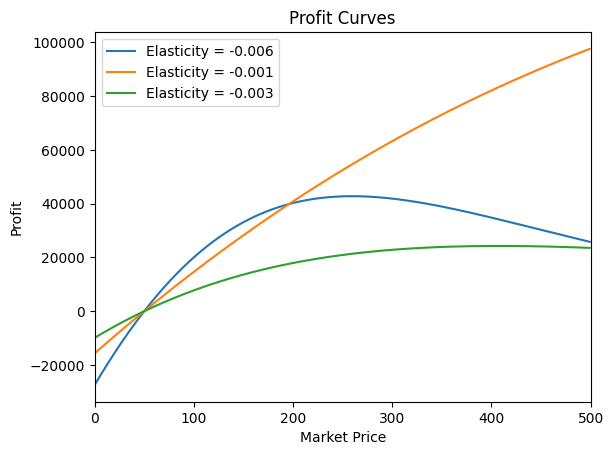

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the demand curves for three price elasticities
def demand0(mkt_price):
    return 1000 * (1/ (1 + np.exp(-(0.197 - 0.006 * mkt_price))))

def demand1(mkt_price):
    return 1000 * (1 / (1 + np.exp(-(-0.782 - 0.001 * mkt_price))))

def demand2(mkt_price):
    return 1000 * (1 / (1 + np.exp(-(-1.397 - 0.003 * mkt_price))))

# Set the cost of production
cost = 50

# Generate a range of market prices to evaluate
mkt_prices = np.arange(0, 500)

# Calculate the profit for each market price and demand curve
profit0 = demand0(mkt_prices) * (mkt_prices - cost)
profit1 = demand1(mkt_prices) * (mkt_prices - cost)
profit2 = demand2(mkt_prices) * (mkt_prices - cost)

# Find the optimal price that maximizes profit
optimal_price0 = mkt_prices[np.argmax(profit0)]
optimal_price1 = mkt_prices[np.argmax(profit1)]
optimal_price2 = mkt_prices[np.argmax(profit2)]

# Print the optimal prices
print("Optimal price for elasticity = -0.006: ", optimal_price0)
print("Optimal price for elasticity = -0.001: ", optimal_price1)
print("Optimal price for elasticity = -0.003: ", optimal_price2)

# Plot the profit curves
plt.plot(mkt_prices, profit0, label='Elasticity = -0.006')
plt.plot(mkt_prices, profit1, label='Elasticity = -0.001')
plt.plot(mkt_prices, profit2, label='Elasticity = -0.003')
plt.xlabel('Market Price')
plt.ylabel('Profit')
plt.title('Profit Curves')
plt.legend()
plt.xlim([0, 500])
plt.show()

